## Clustering Assignment

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

### Objective 

Categorise the countries using some socio-economic and health factors that determine the overall development of the country to suggest the countries which the CEO needs to focus on the most. 

In [1]:
#Import Libraries
from __future__ import print_function
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans



from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering 

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Load and Process the Data

In [2]:
df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
#converting the exports, imports and health to specific values from percentages
df["exports"] = df["exports"]*df["gdpp"]/100
df["imports"] = df["imports"]*df["gdpp"]/100
df["health"] = df["health"]*df["gdpp"]/100
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
#setting country column as index
#df.drop(columns=["country"], axis=1, inplace=True)
df.set_index('country',inplace=True)

In [6]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [7]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
#checking for null/missing values
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### Univariate and Bivariate Analysis

In [9]:
list(df.columns)

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

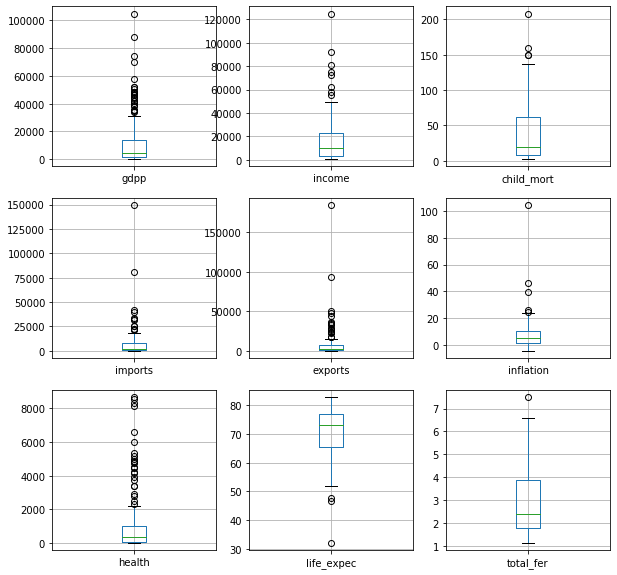

In [10]:
#outlier Analysis
plt.figure(figsize=(10,10))

plt.subplot(3,3,1)
df.boxplot(column='gdpp')

plt.subplot(3,3,2)
df[['income']].boxplot()

plt.subplot(3,3,3)
df[['child_mort']].boxplot()

plt.subplot(3,3,4)
df[['imports']].boxplot()

plt.subplot(3,3,5)
df[['exports']].boxplot()

plt.subplot(3,3,6)
df[['inflation']].boxplot()

plt.subplot(3,3,7)
df[['health']].boxplot()

plt.subplot(3,3,8)
df[['life_expec']].boxplot()

plt.subplot(3,3,9)
df[['total_fer']].boxplot()

plt.show()

GDPP, Income, imports, exports and health seems to have high outliers but keeping them as is because a lot of countries would be removed if we choose to remove them and if we cap them this might change very high income/gdpp countries.

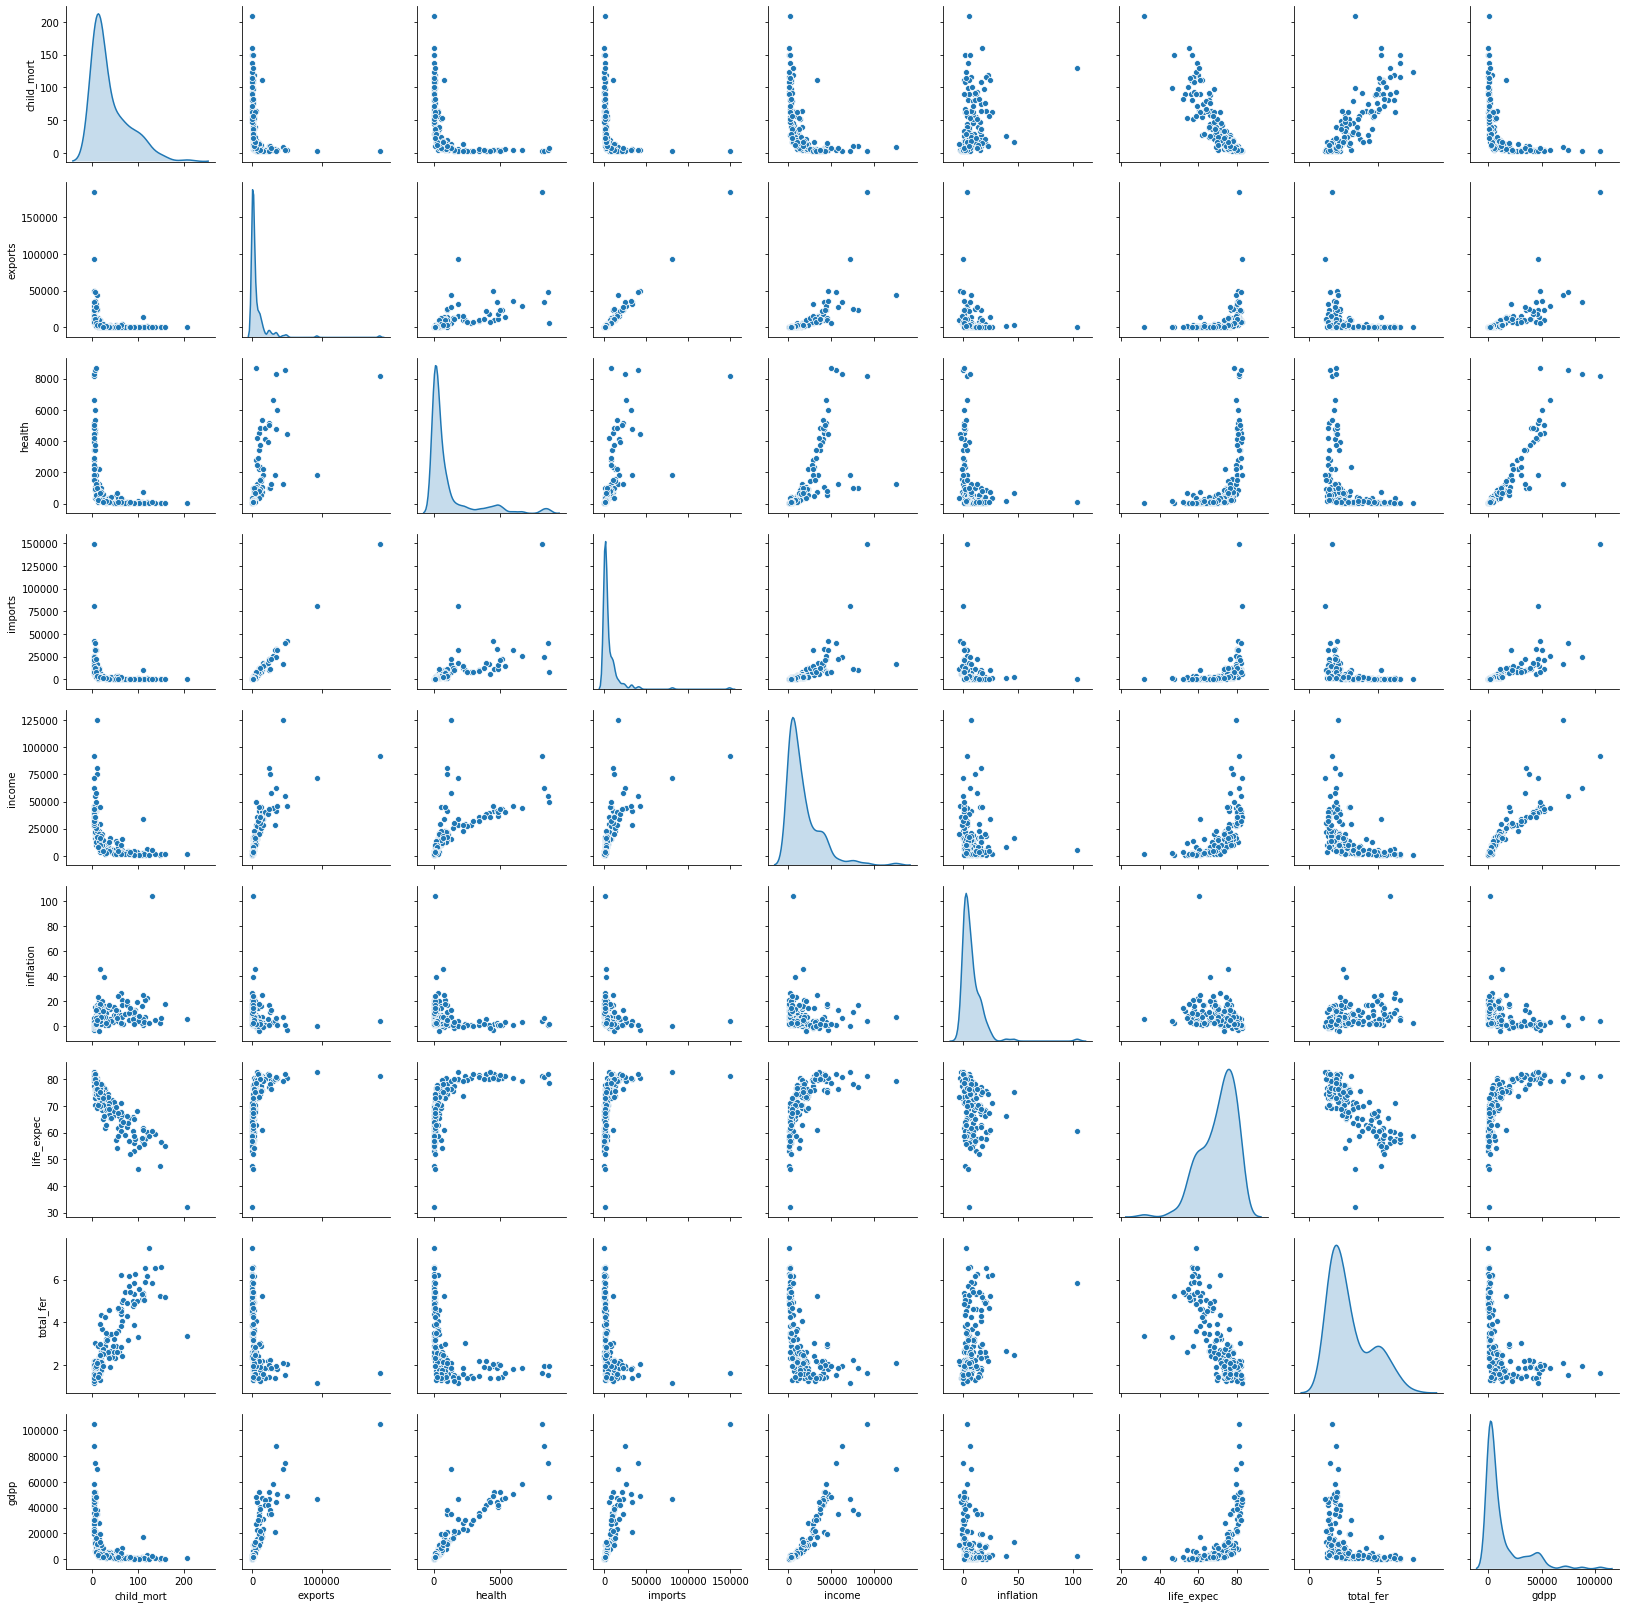

In [11]:
#Plotting scatter plots for all the variables 
sns.pairplot(df,diag_kind='kde')
plt.show()

Except life expectancy all other variables are left skewed.

In [12]:
df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


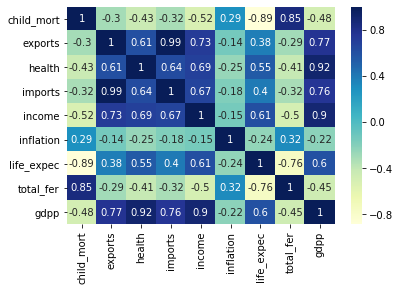

In [13]:
ax = sns.heatmap(df.corr(), annot=True,cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim( bottom+0.5,top-0.5)
plt.show()

In [14]:
#Applying power transformation to remove the skewness
pt = PowerTransformer()
dft = pd.DataFrame(pt.fit_transform(df))
dft.columns= df.columns

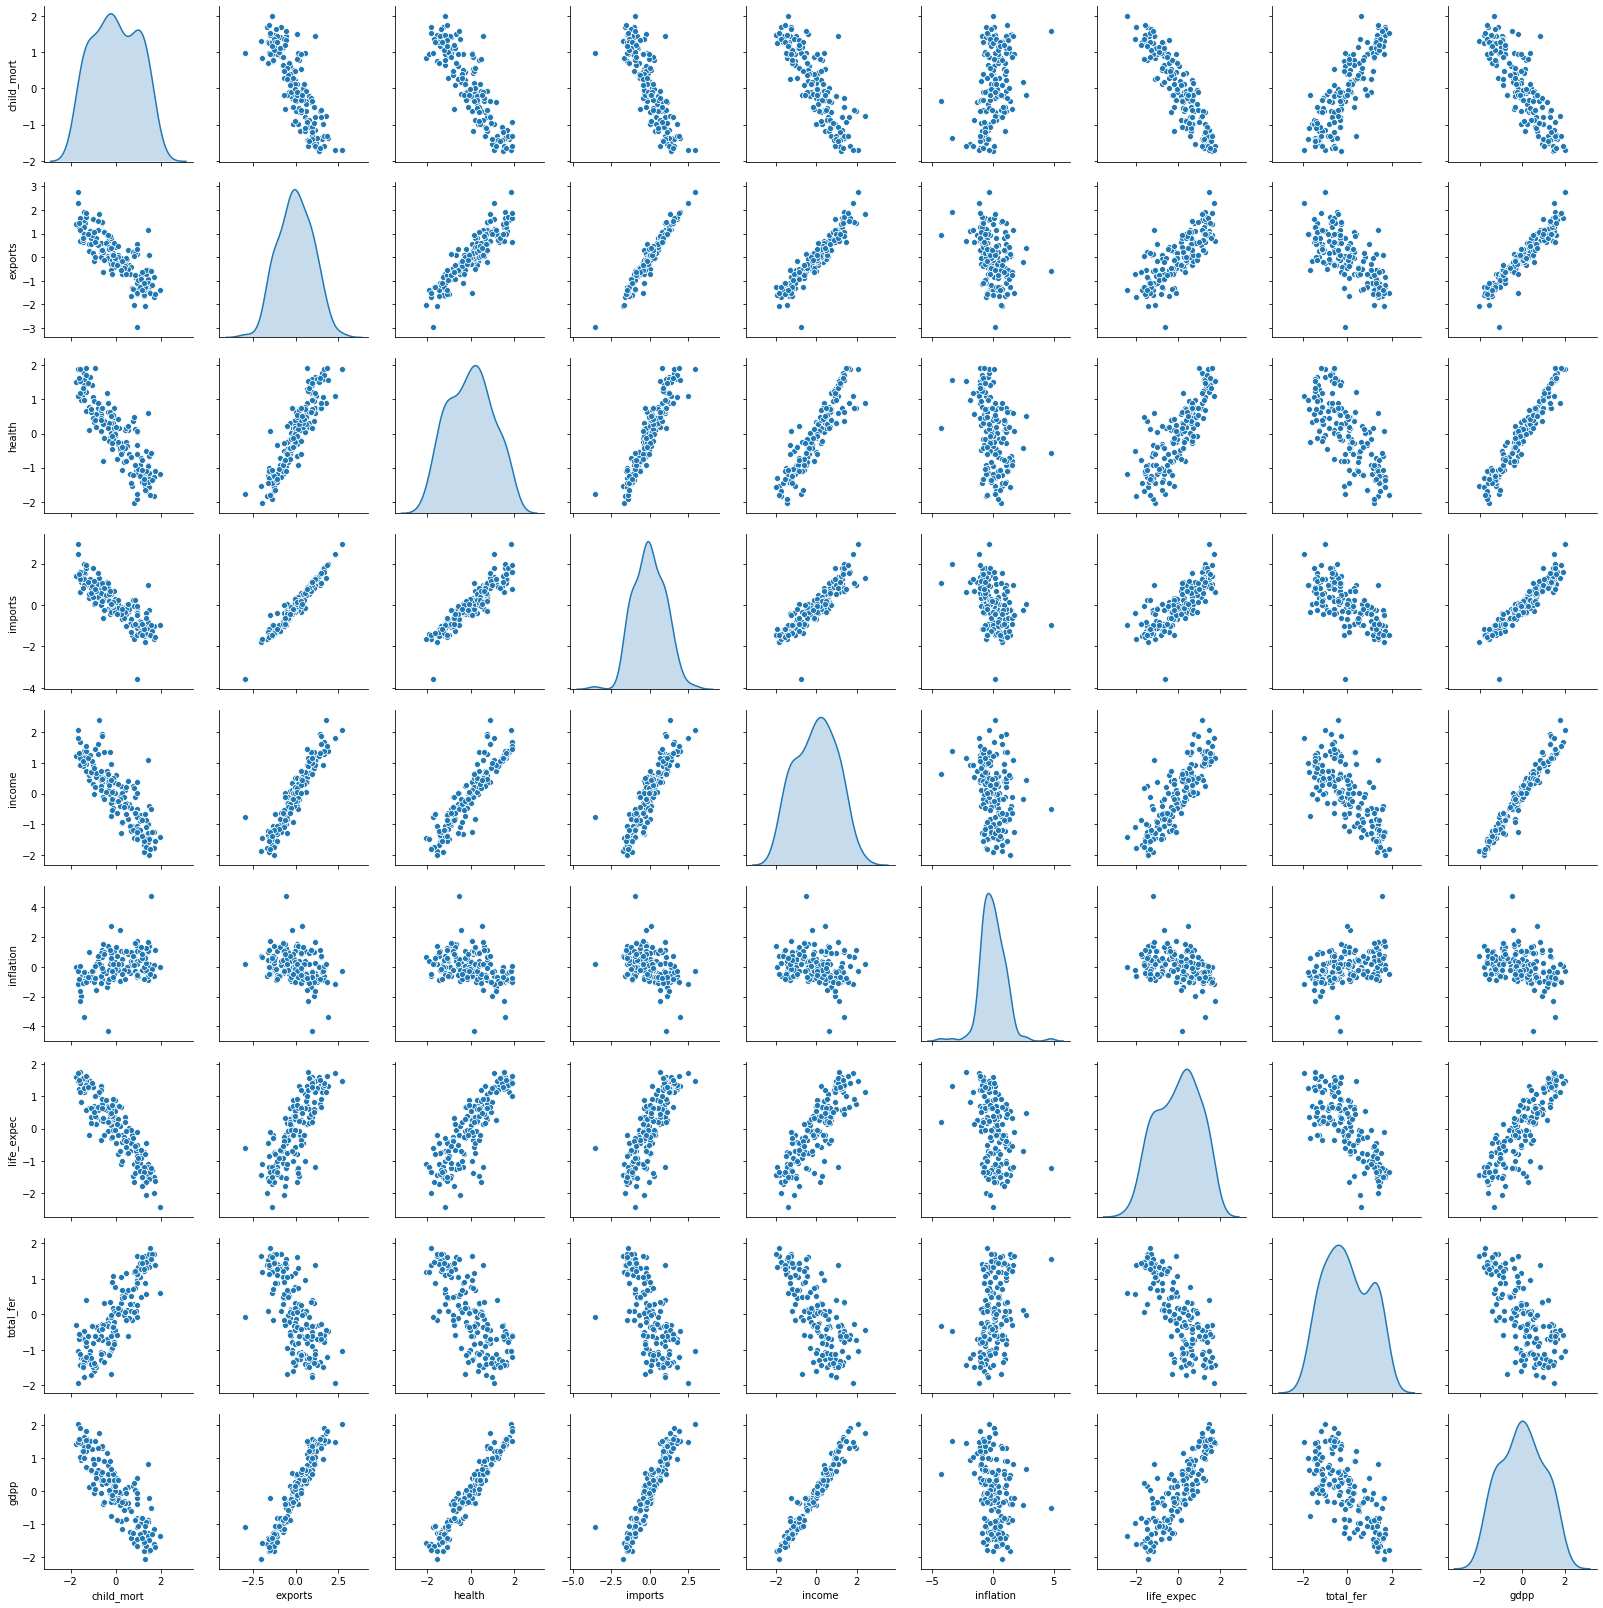

In [15]:
#Plotting scatter plots for all the variables for transformed data
sns.pairplot(dft,diag_kind='kde')
plt.show()

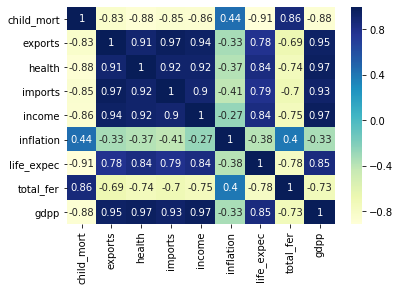

In [16]:
ax = sns.heatmap(dft.corr(), annot=True,cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim( bottom+0.5,top-0.5)
plt.show()

The correlations are high for most of the variables.

In [17]:
dft.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-2.566144e-16,2.114077e-16,1.755083e-16,2.692457e-16,6.581562e-17,-1.196648e-16,1.608826e-16,2.459776e-16,-4.088546e-16
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-1.744350e+00,-2.970365e+00,-2.042388e+00,-3.587547e+00,-2.011864e+00,-4.317213e+00,-2.416375e+00,-1.930129e+00,-2.048077e+00
25%,-8.284494e-01,-7.061338e-01,-8.233392e-01,-7.232831e-01,-8.409075e-01,-6.380843e-01,-7.685230e-01,-7.821480e-01,-8.736345e-01
50%,-8.831974e-02,-1.139286e-02,6.971540e-02,-3.762465e-02,1.503946e-02,-2.446480e-02,1.556977e-01,-8.277119e-02,-3.385170e-02
75%,9.414307e-01,7.528821e-01,7.274778e-01,8.052977e-01,7.304487e-01,5.918641e-01,6.995533e-01,8.895016e-01,7.029404e-01
max,1.983013e+00,2.745091e+00,1.908333e+00,2.940514e+00,2.395485e+00,4.762676e+00,1.746675e+00,1.873128e+00,2.042503e+00


The data is also scaled with power transformer

## K-Means Clustering

In [18]:
X = dft

In [19]:
#checking the optimal number of clusters
cluster_range = range( 1, 15)
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 100,init='k-means++',random_state=0)
  clusters.fit(X)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia

# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,1503.000000
1,2,650.272277
2,3,418.810059
3,4,364.954777
4,5,326.237895
5,6,295.755138
6,7,273.213867
7,8,253.687511
8,9,236.810425
9,10,222.509126


In [20]:
errors = clusters_df['cluster_errors']
for i in range(8):
    print(errors[i+1]-errors[i])

-852.7277225615844
-231.46221858601177
-53.85528198989914
-38.71688195154144
-30.482756651582974
-22.541270958468147
-19.52635594119394
-16.877086776231238


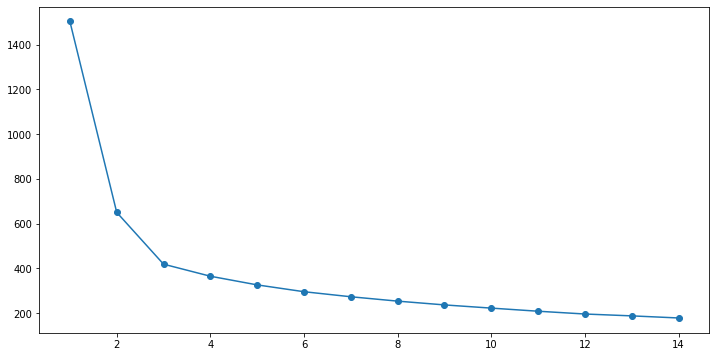

In [21]:
#Plotting the elbow curve
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Three distinct clusters of data can be spotted

In [22]:
# Number of clusters
kmeans = KMeans(n_clusters=3,n_init = 100,init='k-means++',random_state=0)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print("Centroid values")
print("sklearn")
print(centroids) # From sci-kit learn

Centroid values
sklearn
[[ 1.17330507 -1.14975736 -1.17619414 -1.13618535 -1.20962975  0.43422925
  -1.12302598  1.13631868 -1.19390869]
 [-0.04128765  0.03358007  0.03112836 -0.00248561  0.09416955  0.23550992
   0.07353174 -0.18750883  0.03708553]
 [-1.18670464  1.17313325  1.20490898  1.21240979  1.14658763 -0.81270547
   1.08519313 -0.92958118  1.21488186]]


In [23]:
#Predicting the clusters
prediction= kmeans.predict(X)

#Assigning the clusters to the df
X_df = pd.DataFrame(X, columns= dft.columns)
X_df["group"] = prediction

In [24]:
X_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,group
0,1.266699,-1.658719,-1.239313,-1.246055,-1.368935,0.459416,-1.526455,1.544053,-1.462273,0
1,-0.220994,-0.238427,-0.042924,-0.055108,0.012538,-0.154659,0.621738,-0.992833,-0.121133,1
2,0.217834,-0.030785,-0.270052,-0.266188,0.232275,1.059790,0.652698,0.313175,-0.063195,1
3,1.506186,0.100544,-0.661987,-0.219429,-0.408251,1.512843,-1.239045,1.623128,-0.219666,0
4,-0.637380,0.602677,0.563269,0.758134,0.572583,-0.723442,0.699553,-0.368063,0.609228,2


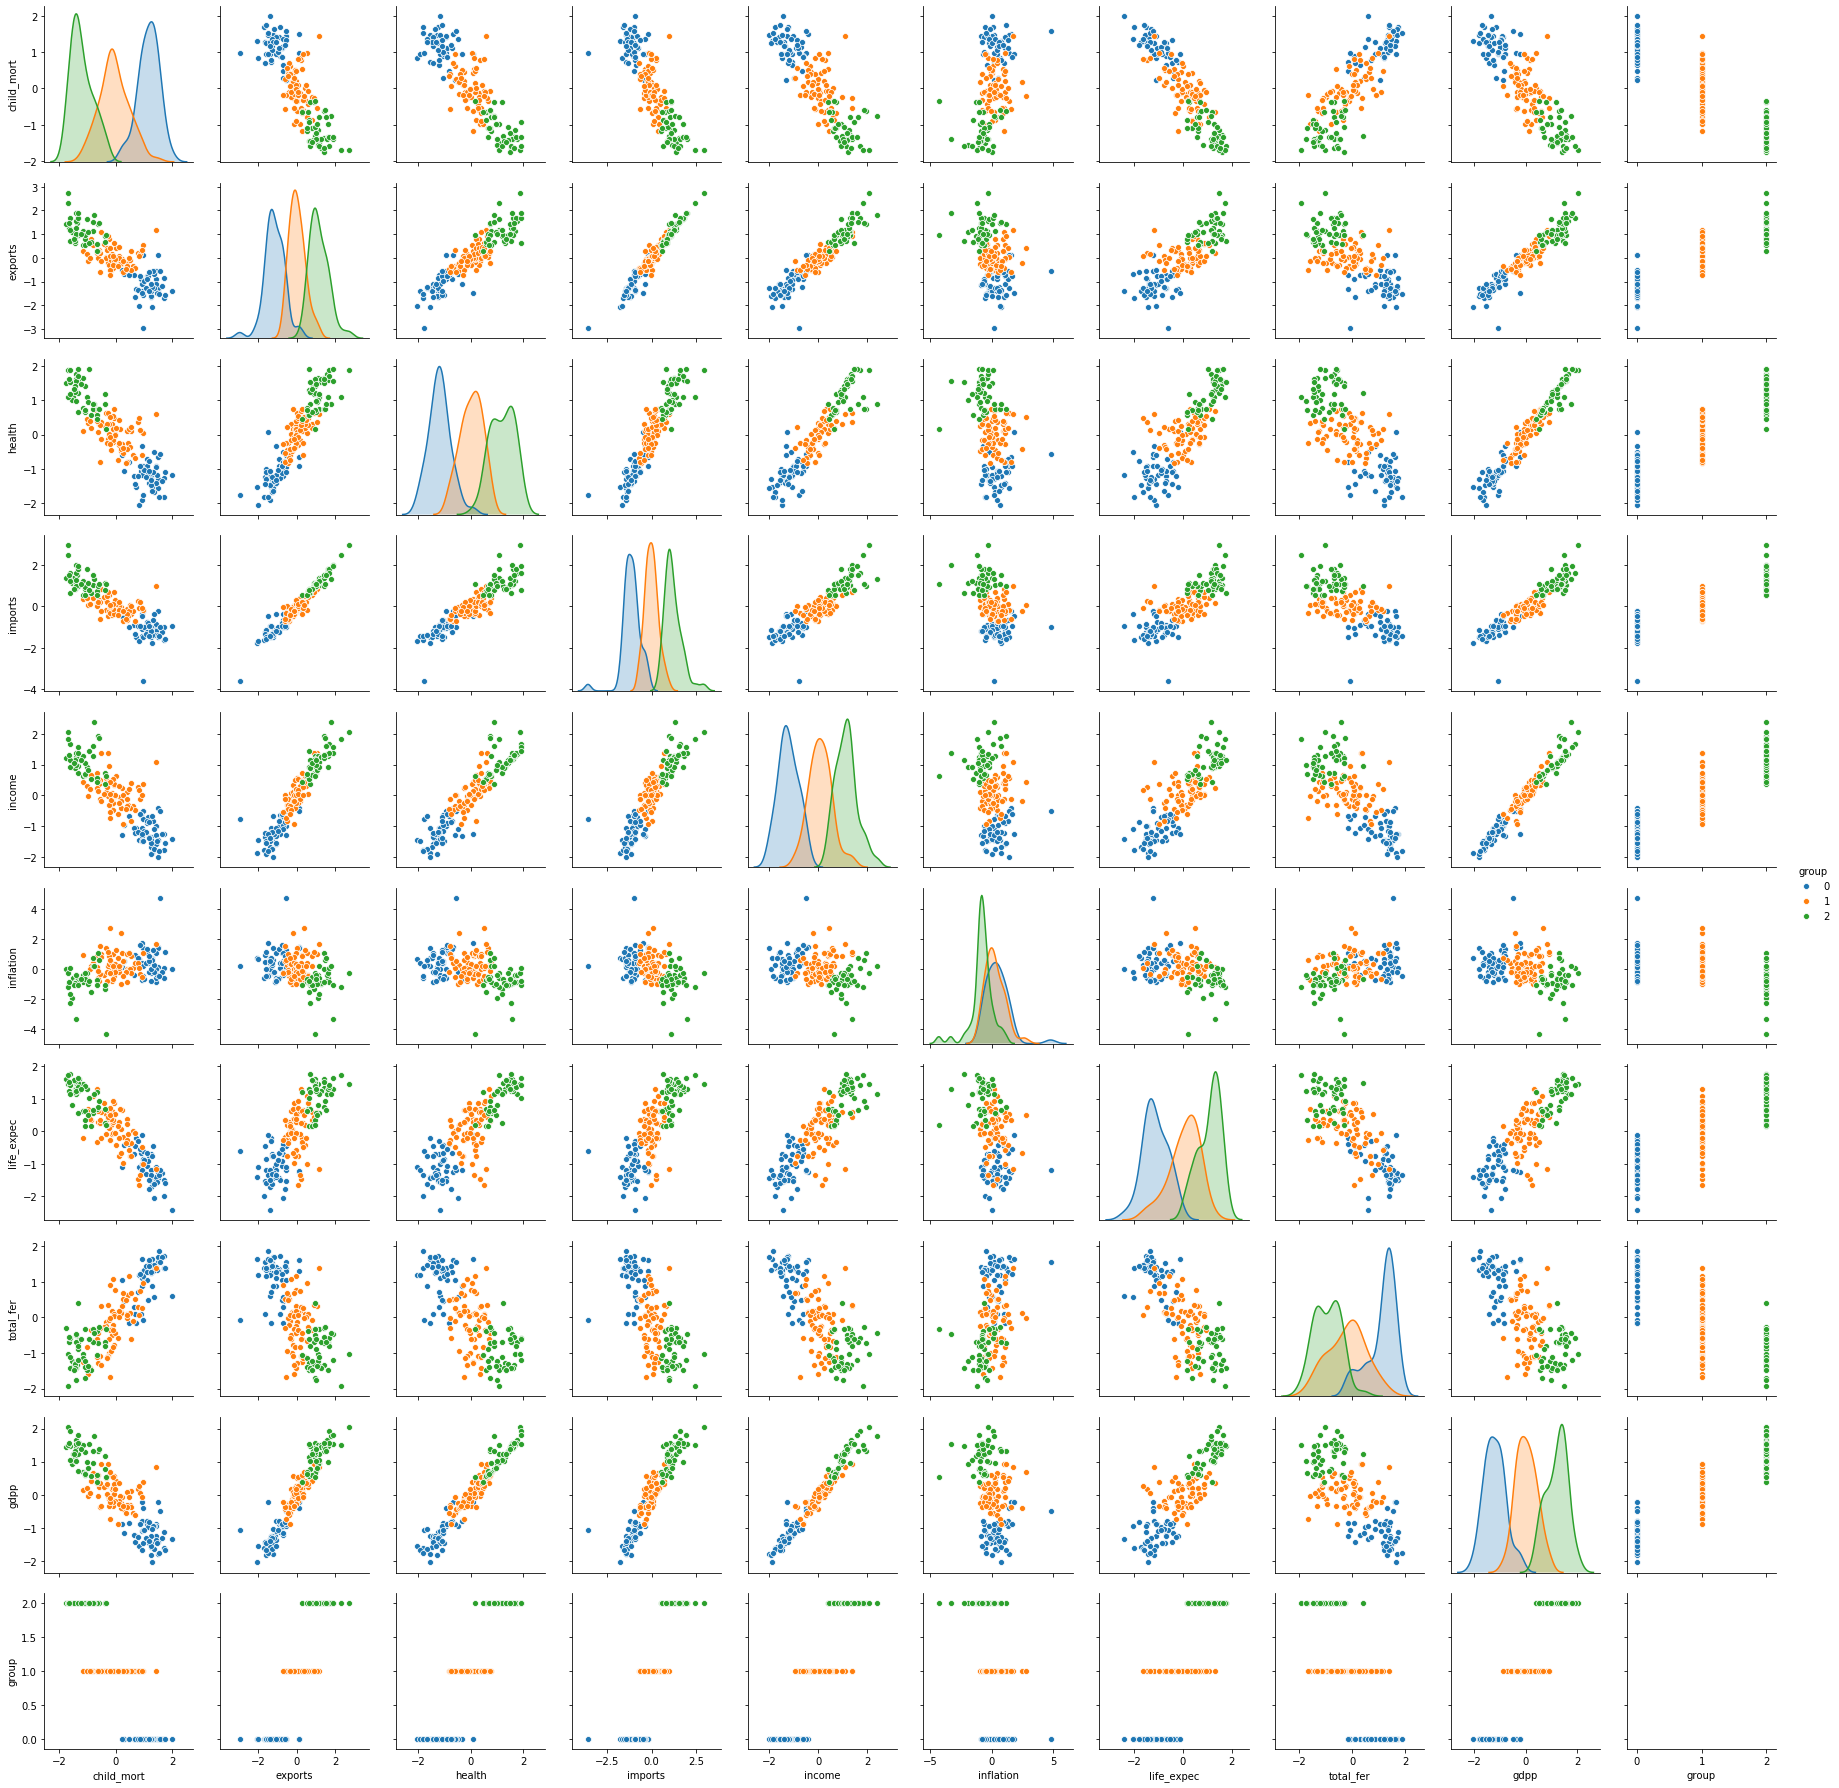

In [25]:
#plotting the clusters
sns.pairplot(X_df,diag_kind='kde',hue='group')
plt.show()

We can see that clusters formed above are fine and with three clusters all the variables seems to be segmented properly.

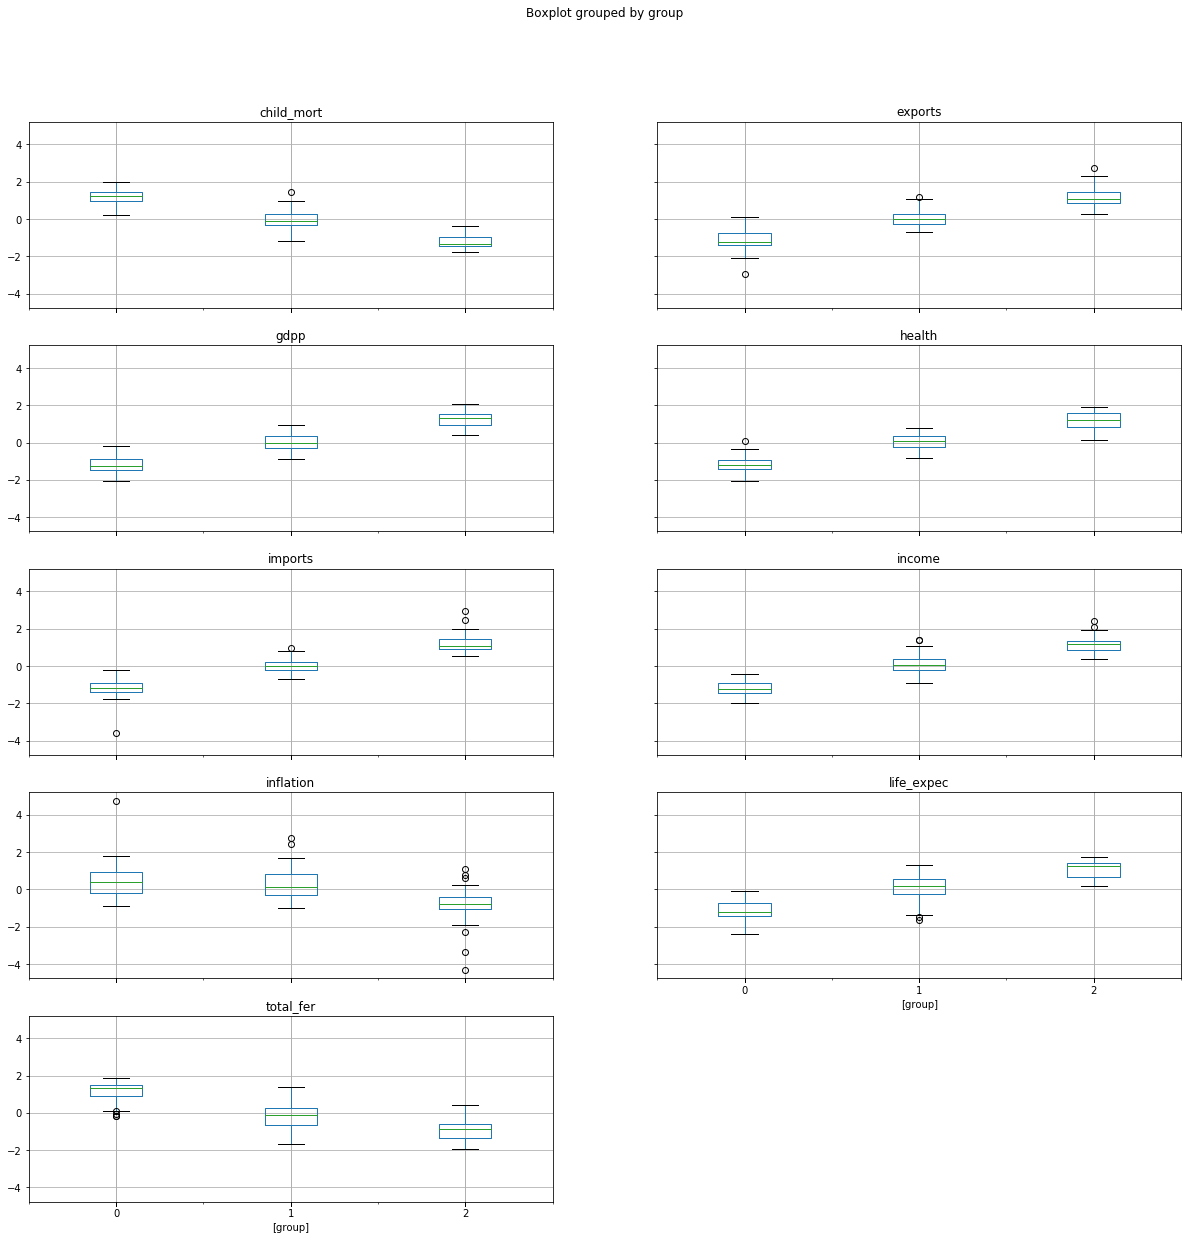

In [26]:
X_df.boxplot(by = 'group',layout=(5,2), figsize=(20, 20))
plt.show()

From the above plots we can infer that following:
1. Group 0 countries have high child mortality, high inflation, high total fertility while low income, low imports, low exports, low health, low life expectancy seems to be under developed countries.
2. Group 1 countries have moderate values seems to be developing countries.
3. Group 2 countries have high GDPP, high income, high imports/exports, high health, low inflation, high life expectancy seems to be developed countries.

Therefore the countries belonging to Group 0 would need the aid first.

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.44351069200040283


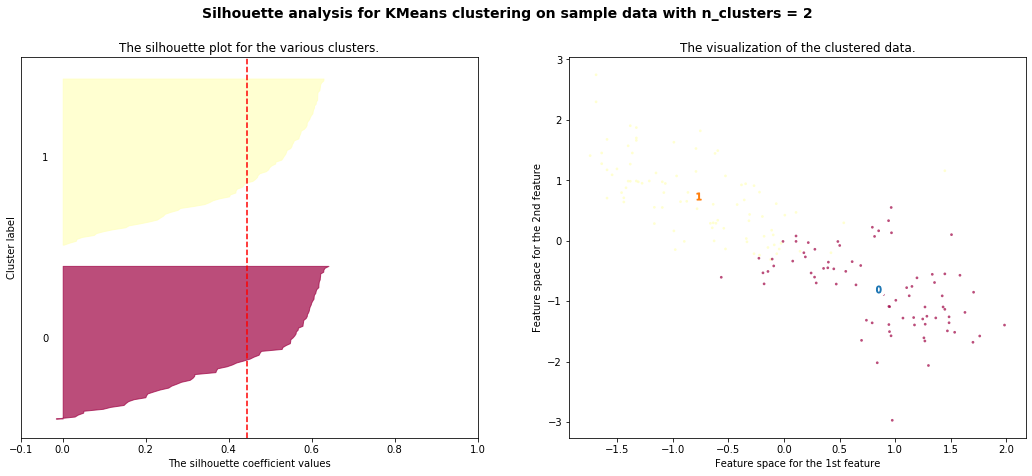

For n_clusters = 3 The average silhouette_score is : 0.3970904804043125


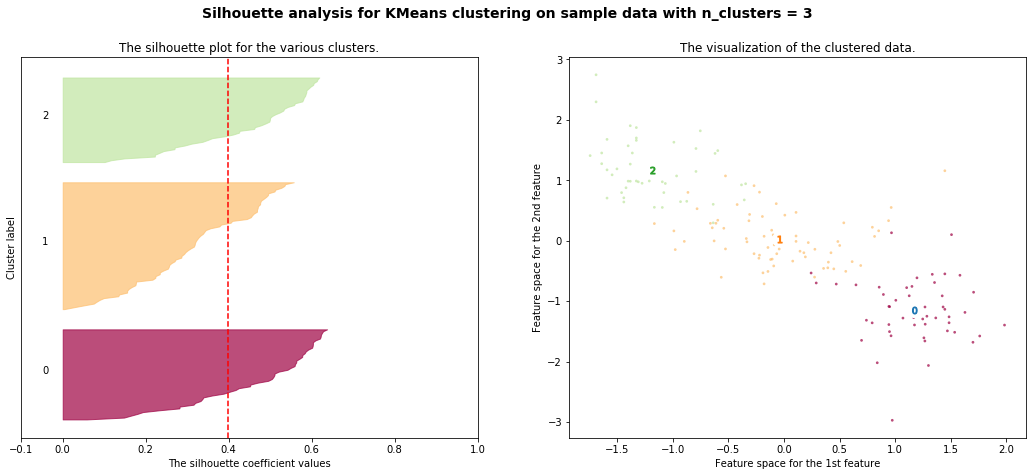

For n_clusters = 4 The average silhouette_score is : 0.3115032103381727


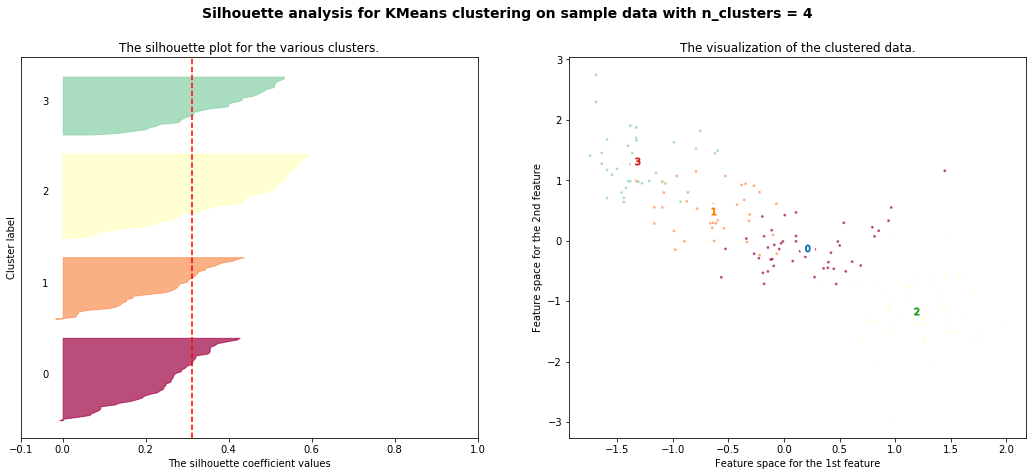

For n_clusters = 5 The average silhouette_score is : 0.3150718163386486


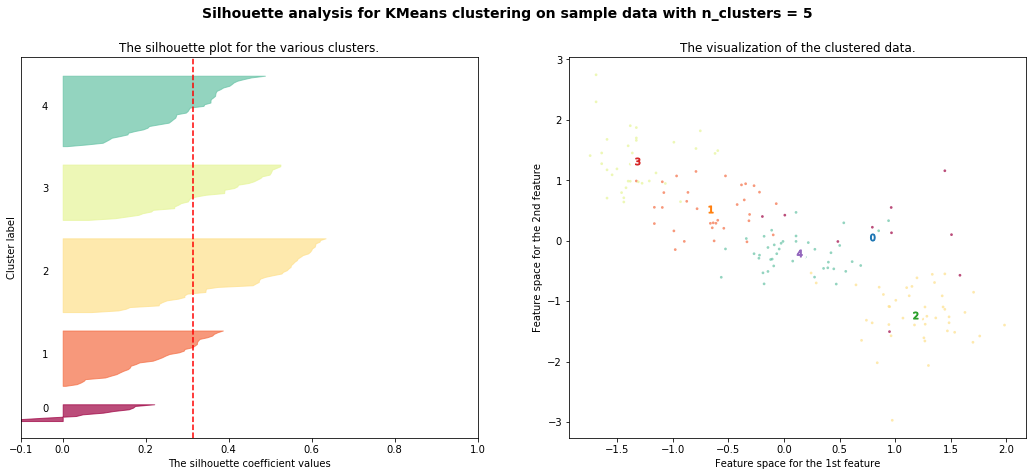

For n_clusters = 6 The average silhouette_score is : 0.281456147435715


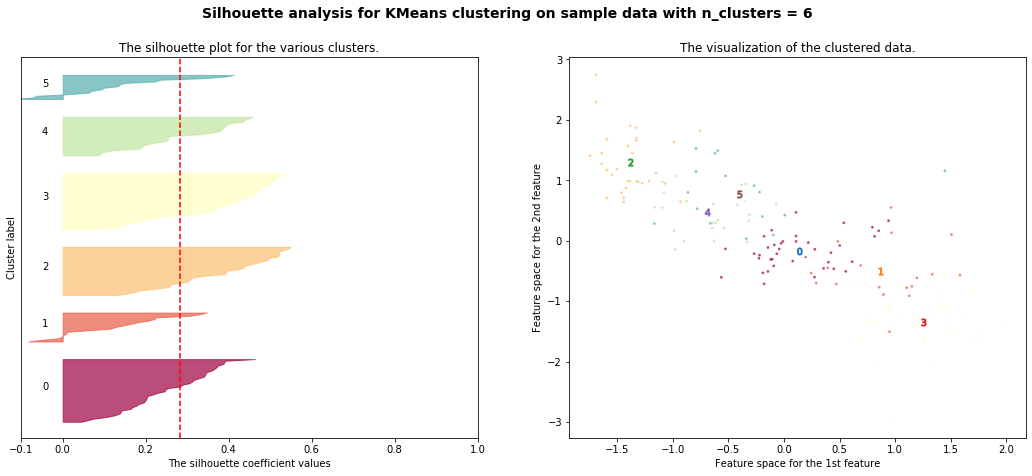

For n_clusters = 7 The average silhouette_score is : 0.2750199200270892


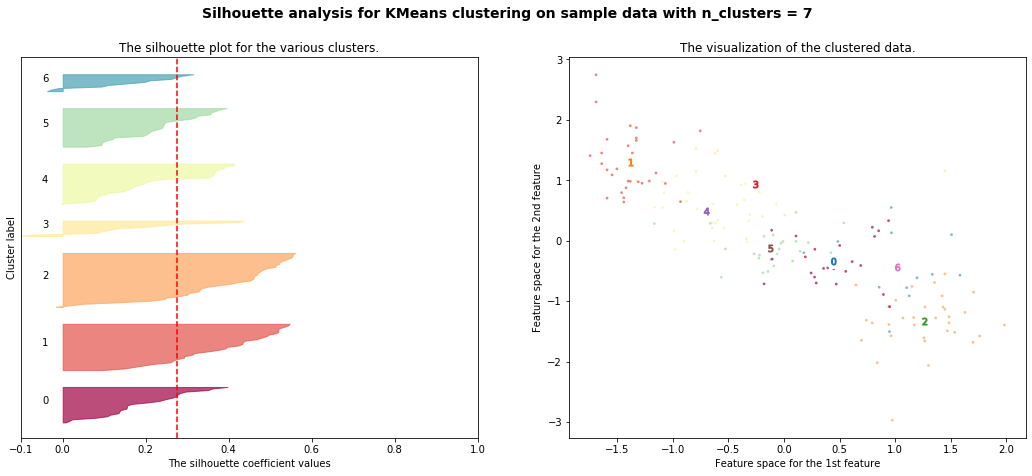

For n_clusters = 8 The average silhouette_score is : 0.26175958437922514


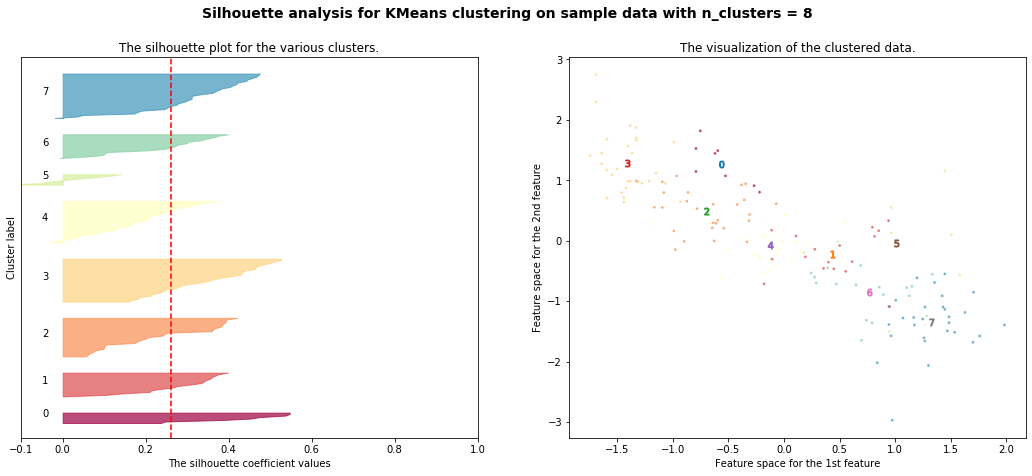

For n_clusters = 9 The average silhouette_score is : 0.24471887048705576


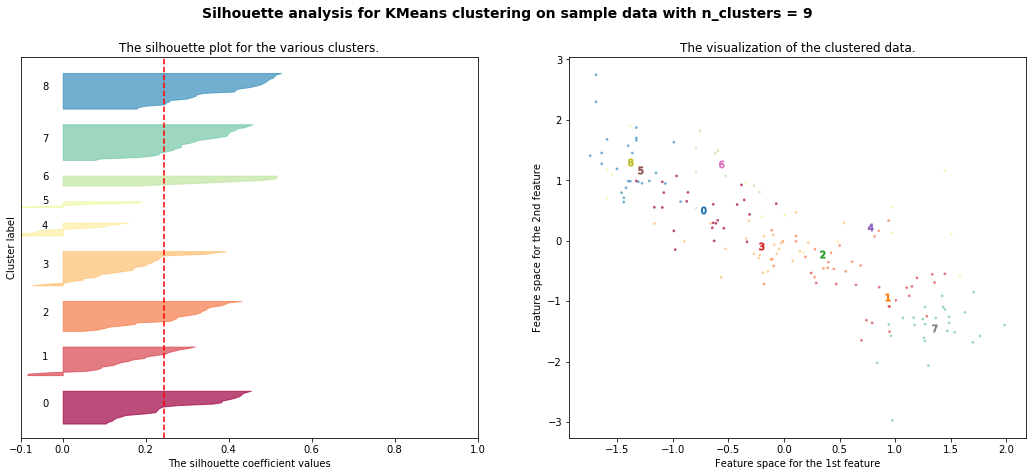

For n_clusters = 10 The average silhouette_score is : 0.2851567659709286


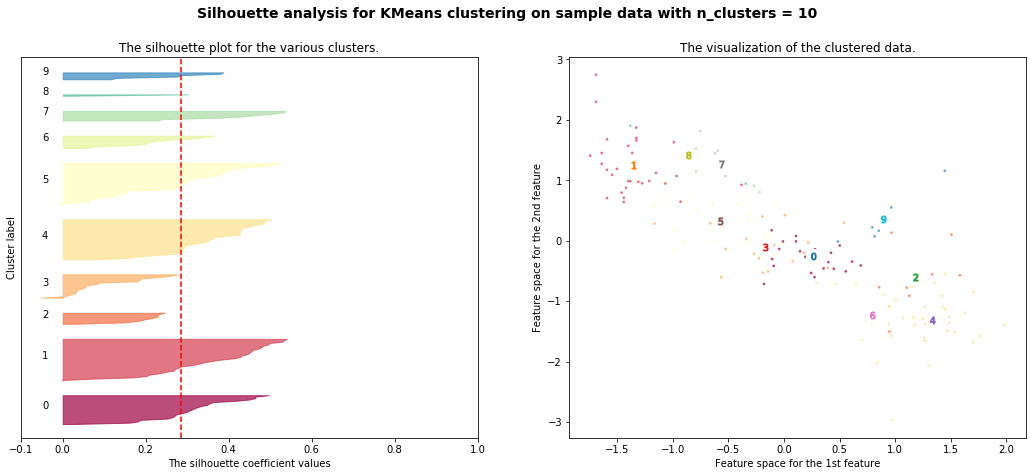

For n_clusters = 11 The average silhouette_score is : 0.25191797973998914


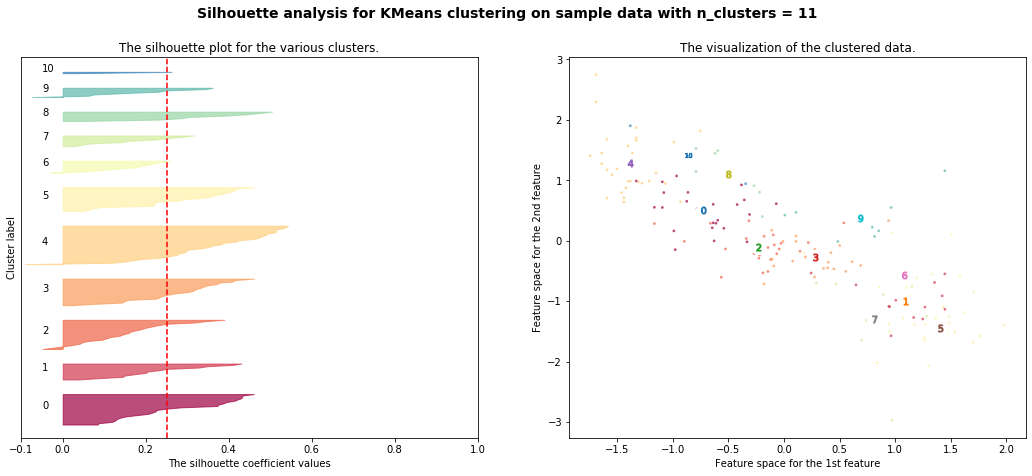

For n_clusters = 12 The average silhouette_score is : 0.23071884840572657


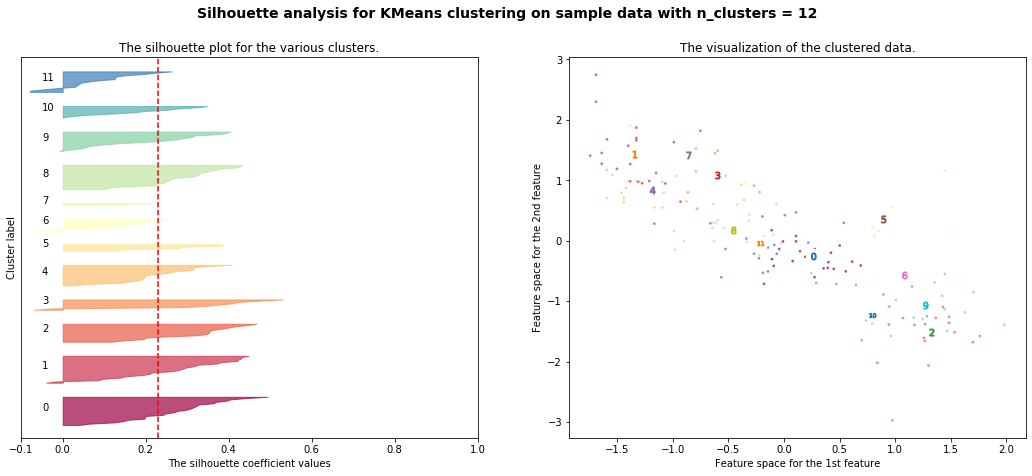

For n_clusters = 13 The average silhouette_score is : 0.2132928149491513


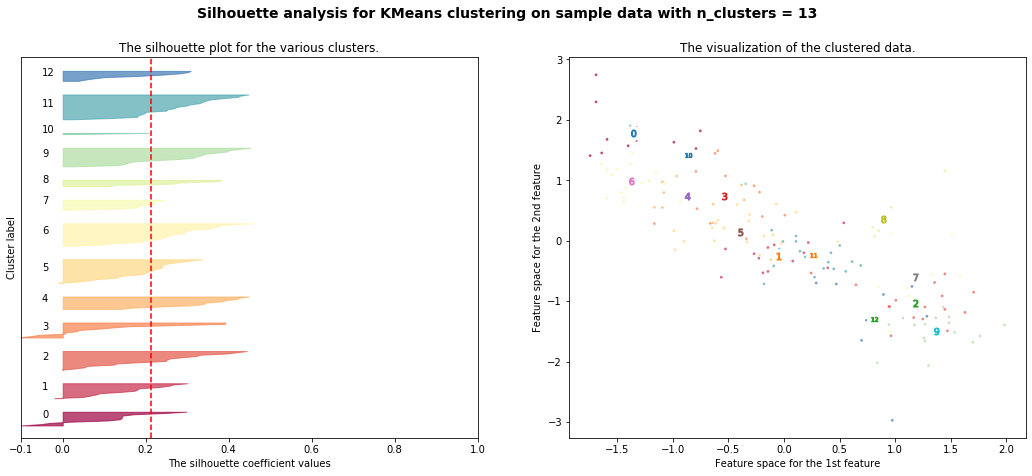

For n_clusters = 14 The average silhouette_score is : 0.23588816089753273


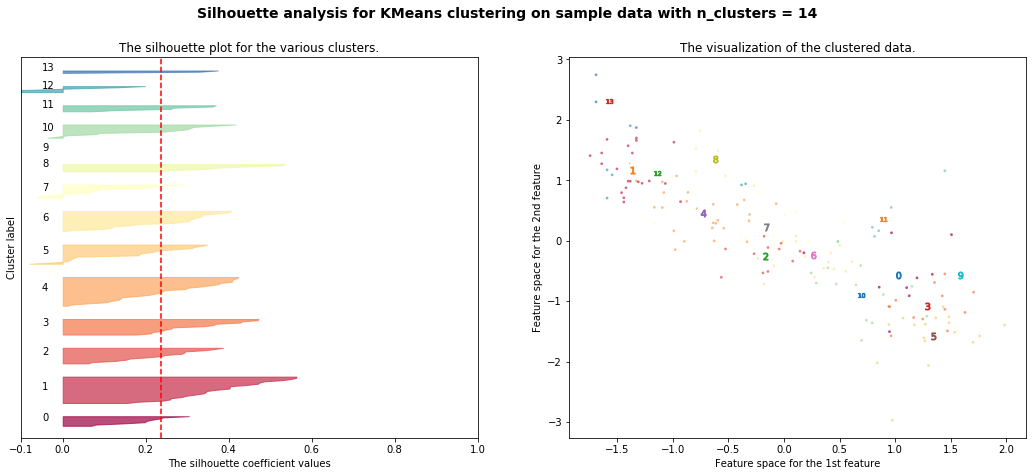

For n_clusters = 15 The average silhouette_score is : 0.23172468861513593


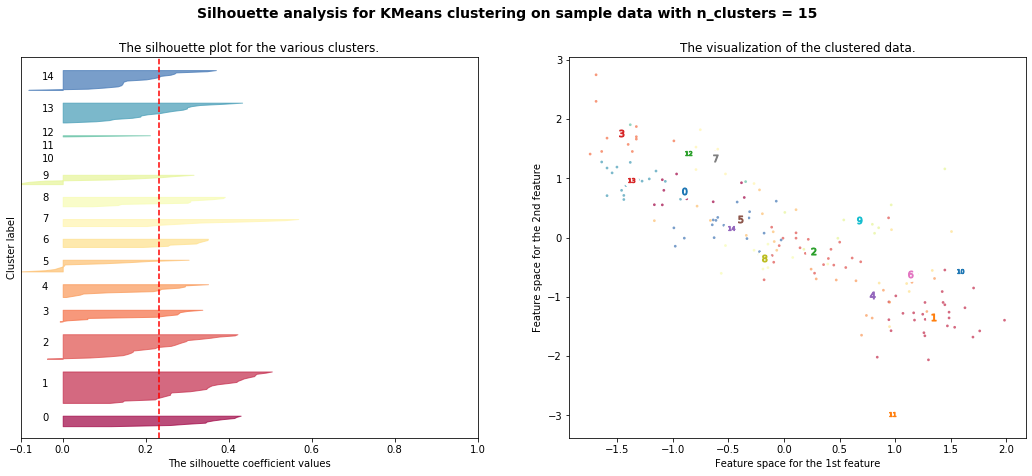

For n_clusters = 16 The average silhouette_score is : 0.21943674706964894


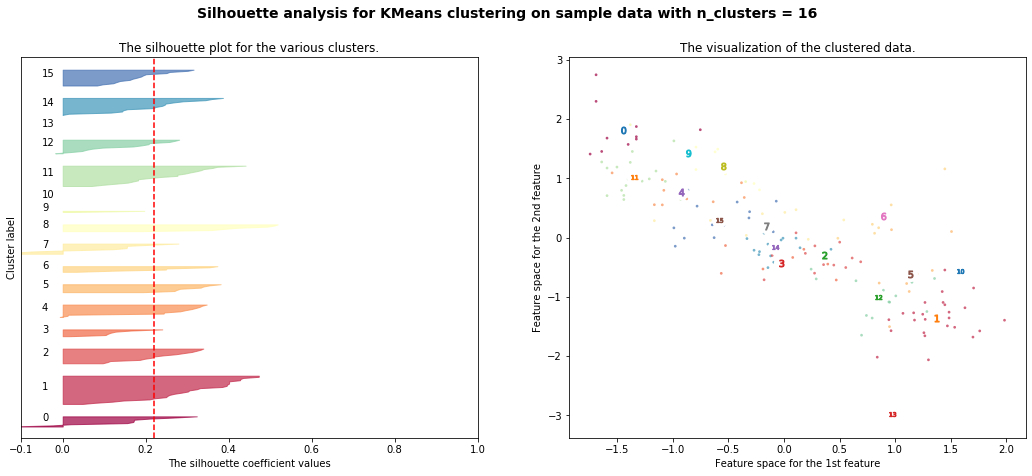

In [27]:
#Finding the silhoutte score
print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=X_df.drop('group',axis=1).values
y=X_df['group'].values

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,n_init = 100,init='k-means++',random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

The silhouette score is highest for K=2 and then k=3 but as there are few outliers in the data we can conclude that K=3 is the optimal number of clusters.

In [28]:
#Assigning country names as index to the data frame
X_df.index = df.index

In [29]:
X_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,group
country,,,,,,,,,,
Afghanistan,1.266699,-1.658719,-1.239313,-1.246055,-1.368935,0.459416,-1.526455,1.544053,-1.462273,0
Albania,-0.220994,-0.238427,-0.042924,-0.055108,0.012538,-0.154659,0.621738,-0.992833,-0.121133,1
Algeria,0.217834,-0.030785,-0.270052,-0.266188,0.232275,1.059790,0.652698,0.313175,-0.063195,1
Angola,1.506186,0.100544,-0.661987,-0.219429,-0.408251,1.512843,-1.239045,1.623128,-0.219666,0
Antigua and Barbuda,-0.637380,0.602677,0.563269,0.758134,0.572583,-0.723442,0.699553,-0.368063,0.609228,2


In [30]:
#Grouping the clusters with groups and getting the countries of group 0 which need aid first
Aid_Cntry = X_df[X_df.group == 0].sort_values(['gdpp','income','child_mort'], ascending=[True,True,False]).head(10)
Aid_Cntry

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,group
country,,,,,,,,,,
Burundi,1.298780,-2.063795,-1.541130,-1.770468,-1.867384,0.738196,-1.422077,1.645014,-2.048077,0
Liberia,1.257999,-1.606617,-1.294897,-1.138832,-1.923514,-0.013415,-1.181773,1.323867,-1.814890,0
"Congo, Dem. Rep.",1.484194,-1.259150,-1.550729,-1.460581,-2.011864,1.405163,-1.436428,1.703294,-1.800675,0
Niger,1.534638,-1.514535,-1.813260,-1.444379,-1.826407,-0.484814,-1.340700,1.873128,-1.773118,0
Sierra Leone,1.759989,-1.576152,-1.091915,-1.556923,-1.558710,1.145065,-1.604688,1.378219,-1.681334,0
Madagascar,0.942840,-1.386846,-1.910343,-1.424122,-1.470105,0.390124,-1.181773,1.183867,-1.658188,0
Mozambique,1.364657,-1.276898,-1.680340,-1.378683,-1.747977,0.260760,-1.635948,1.478218,-1.648508,0
Central African Republic,1.699129,-1.679792,-1.821115,-1.635352,-1.769743,-0.594558,-1.998305,1.381149,-1.606595,0
Malawi,1.269579,-1.380850,-1.459061,-1.478143,-1.672009,0.719890,-1.719425,1.409950,-1.587312,0


The above are the top 10 countries that would need the aid from the analysis based on the analysis using K-Means algorithm.

## Hierarchical Clustering

Analysing the data using Hierarchical clustering

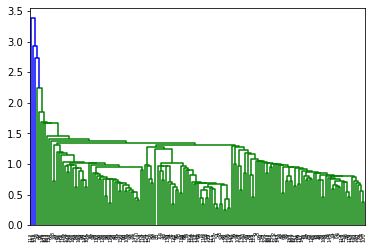

In [31]:
# single linkage
mergings = linkage(dft, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

Using single linkage the dendogram is not so clear so using complete linkage

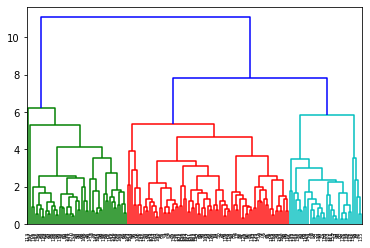

In [32]:
# complete linkage
mergings = linkage(dft, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

Looking at the dendogram above three clusters seems to be optimal with this approach as well. So continuing with three clusters.

In [33]:
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 2,
       0, 2, 1, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0])

In [34]:
# assign cluster labels
X_df['labels'] = cluster_labels
X_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,group,labels
country,,,,,,,,,,,
Afghanistan,1.266699,-1.658719,-1.239313,-1.246055,-1.368935,0.459416,-1.526455,1.544053,-1.462273,0,0
Albania,-0.220994,-0.238427,-0.042924,-0.055108,0.012538,-0.154659,0.621738,-0.992833,-0.121133,1,1
Algeria,0.217834,-0.030785,-0.270052,-0.266188,0.232275,1.059790,0.652698,0.313175,-0.063195,1,1
Angola,1.506186,0.100544,-0.661987,-0.219429,-0.408251,1.512843,-1.239045,1.623128,-0.219666,0,0
Antigua and Barbuda,-0.637380,0.602677,0.563269,0.758134,0.572583,-0.723442,0.699553,-0.368063,0.609228,2,1


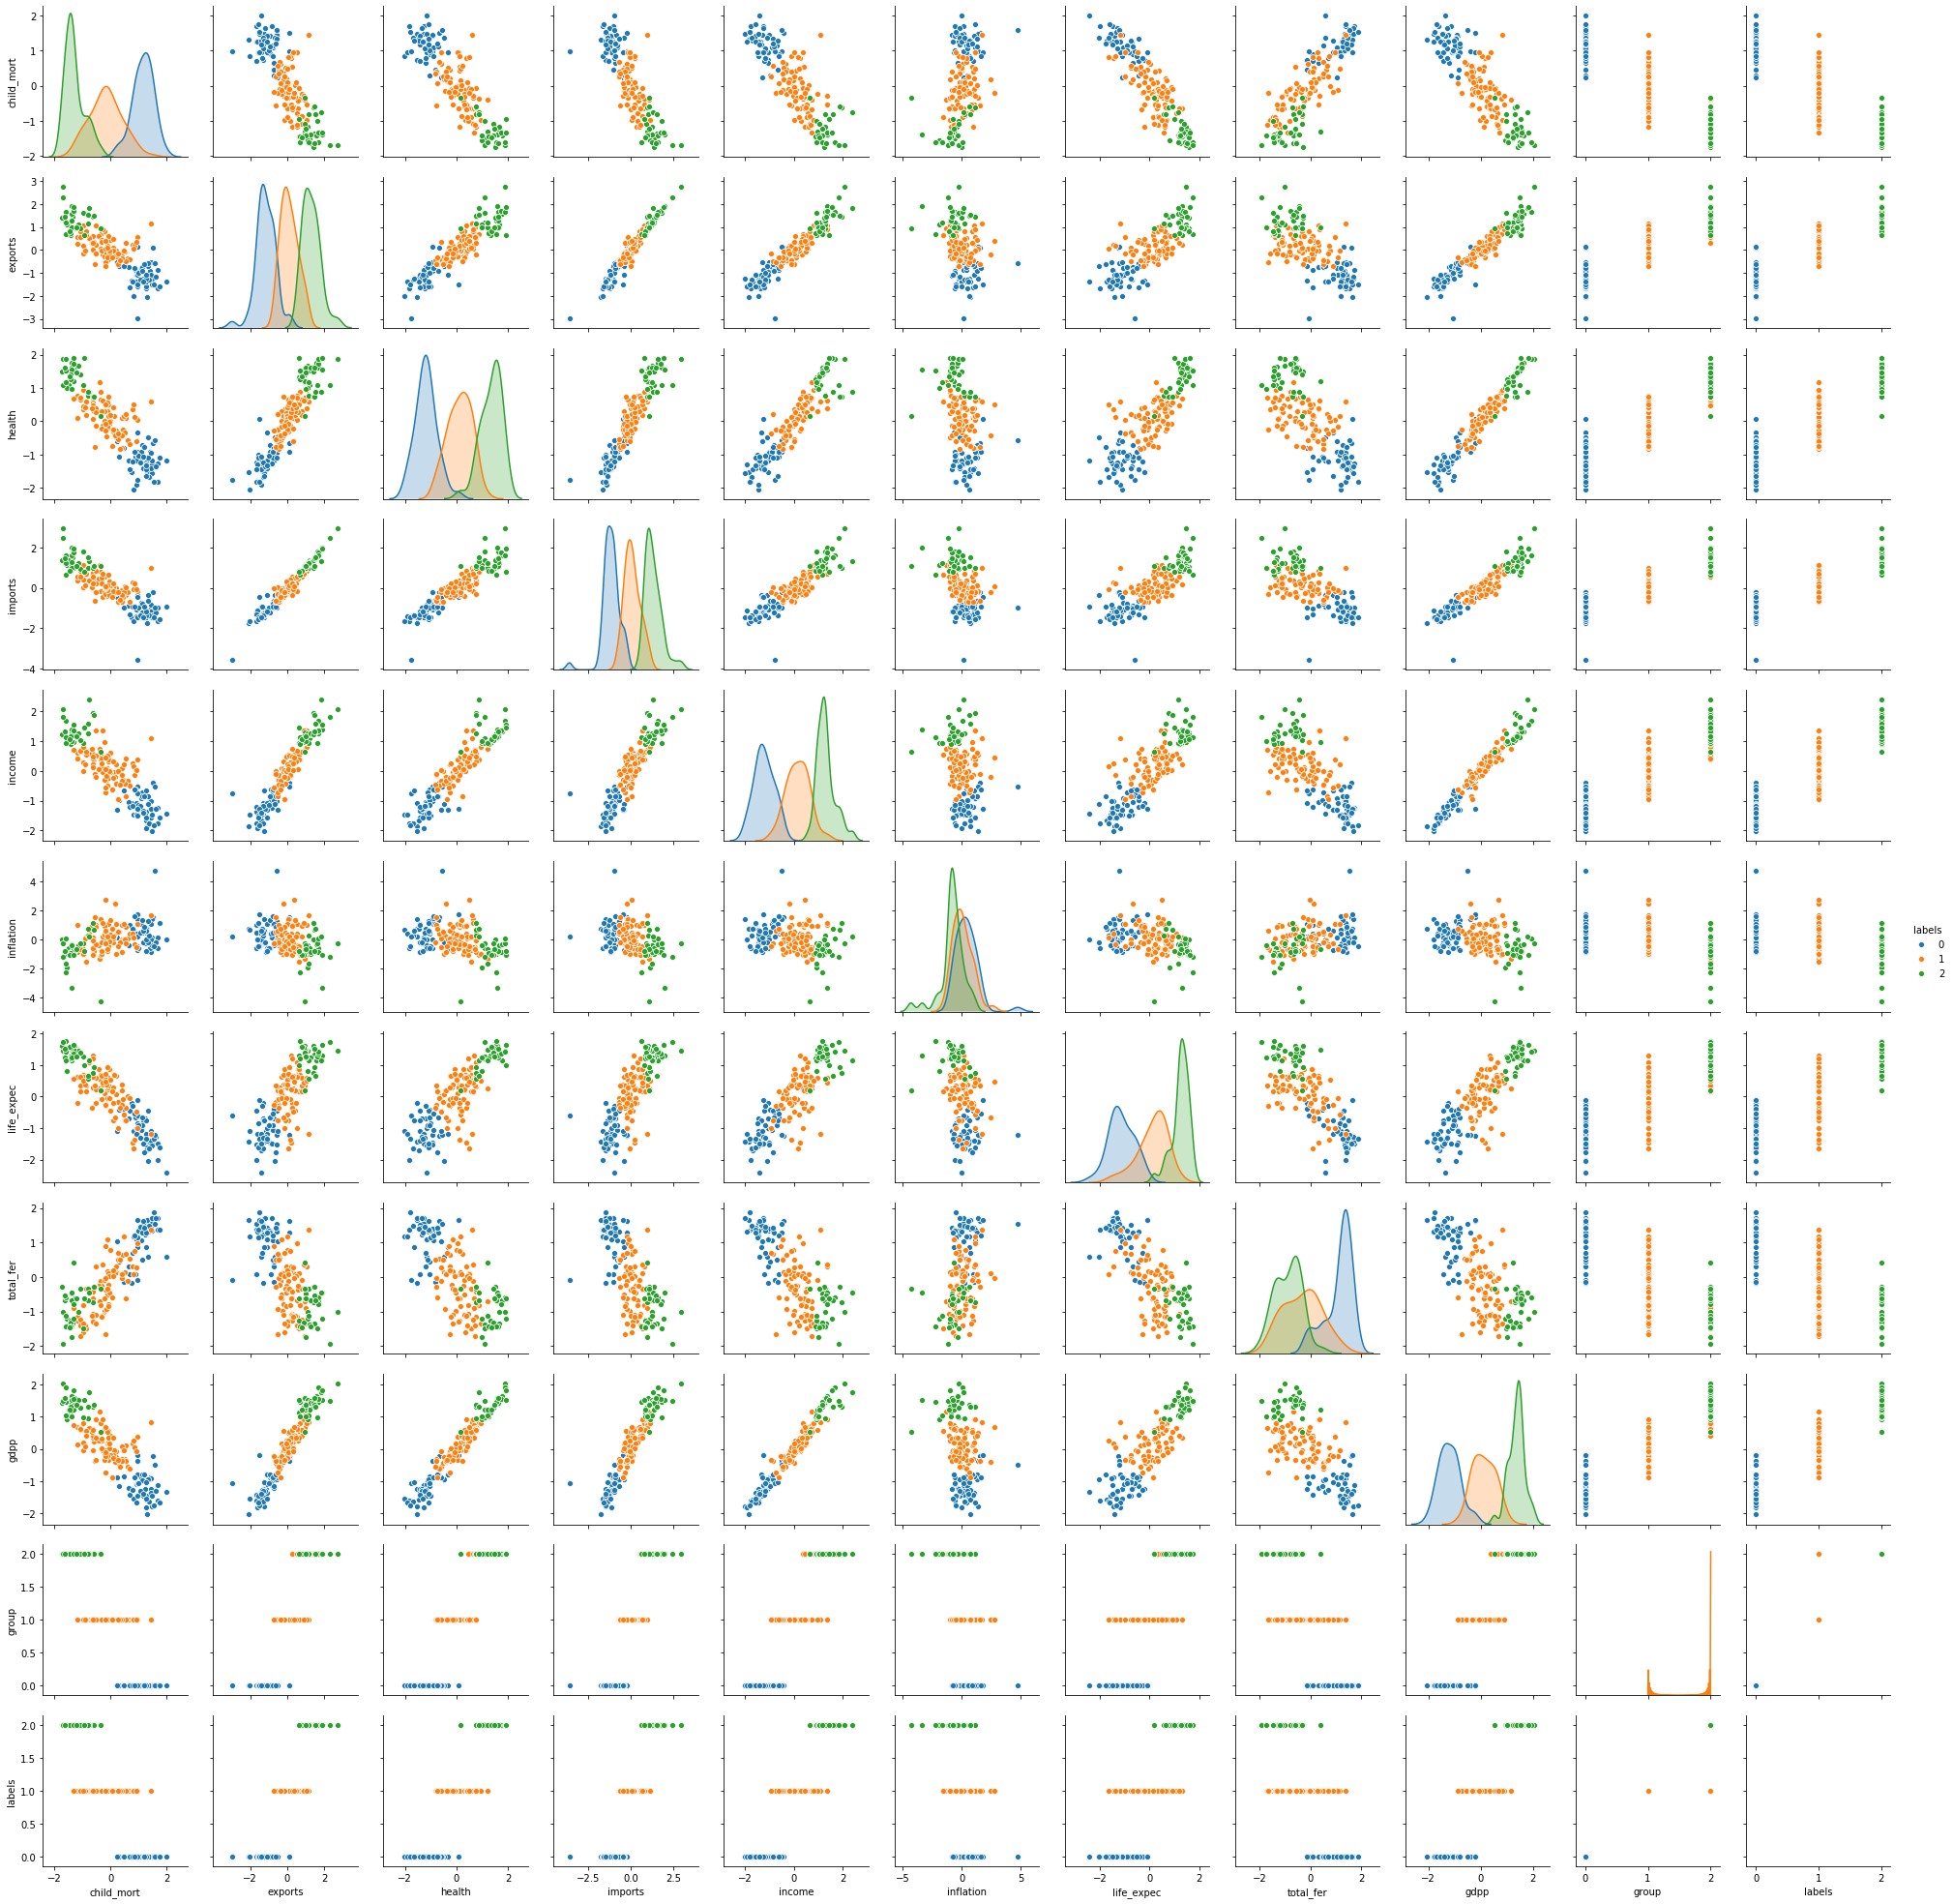

In [35]:
#plotting the clusters
sns.pairplot(X_df,diag_kind='kde',hue='labels')
plt.show()

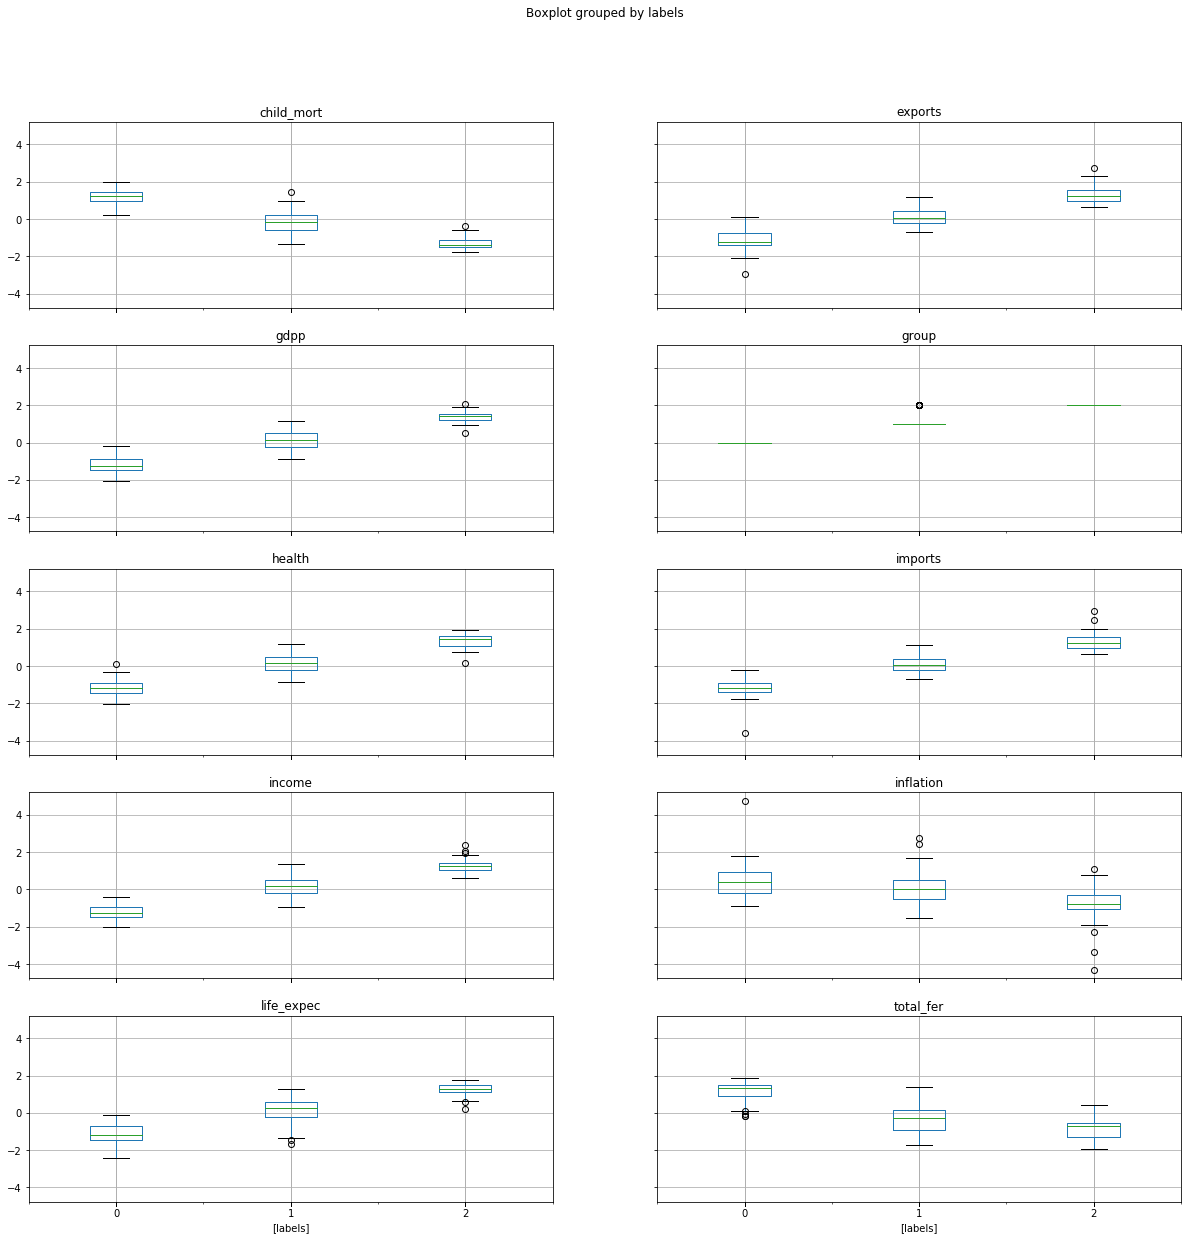

In [36]:
X_df.boxplot(by = 'labels',layout=(5,2), figsize=(20, 20))
plt.show()

From the above plots also we can infer that following:

1. Group 0 countries have high child mortality, high inflation, high total fertility while low income, low imports, low exports, low health, low life expectancy seems to be under developed countries.
2. Group 1 countries have moderate values seems to be developing countries.
3. Group 2 countries have high GDPP, high income, high imports/exports, high health, low inflation, high life expectancy seems to be developed countries.
Therefore the countries belonging to Group 0 would need the aid first.

In [37]:
#Grouping the clusters with groups and getting the countries of group 0 which need aid first
Aid_Cntry_h = X_df[X_df.labels == 0].sort_values(['gdpp','income','child_mort'], ascending=[True,True,False]).head(10)
Aid_Cntry_h

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,group,labels
country,,,,,,,,,,,
Burundi,1.298780,-2.063795,-1.541130,-1.770468,-1.867384,0.738196,-1.422077,1.645014,-2.048077,0,0
Liberia,1.257999,-1.606617,-1.294897,-1.138832,-1.923514,-0.013415,-1.181773,1.323867,-1.814890,0,0
"Congo, Dem. Rep.",1.484194,-1.259150,-1.550729,-1.460581,-2.011864,1.405163,-1.436428,1.703294,-1.800675,0,0
Niger,1.534638,-1.514535,-1.813260,-1.444379,-1.826407,-0.484814,-1.340700,1.873128,-1.773118,0,0
Sierra Leone,1.759989,-1.576152,-1.091915,-1.556923,-1.558710,1.145065,-1.604688,1.378219,-1.681334,0,0
Madagascar,0.942840,-1.386846,-1.910343,-1.424122,-1.470105,0.390124,-1.181773,1.183867,-1.658188,0,0
Mozambique,1.364657,-1.276898,-1.680340,-1.378683,-1.747977,0.260760,-1.635948,1.478218,-1.648508,0,0
Central African Republic,1.699129,-1.679792,-1.821115,-1.635352,-1.769743,-0.594558,-1.998305,1.381149,-1.606595,0,0
Malawi,1.269579,-1.380850,-1.459061,-1.478143,-1.672009,0.719890,-1.719425,1.409950,-1.587312,0,0


Even with hierarchical clustering the same countries are the top 10. Therefore these are in dire need of aid and would recommend the CEO to provide the aid to these countried first based on the analysis.
1. Burundi
2. Liberia
3. Congo, Dem, Rep
4. Niger	
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10. Eritrea